<a href="https://colab.research.google.com/github/luma42/Source-Code-Inspection/blob/master/Popula%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             1000 non-null   object 
 1   Country          1000 non-null   object 
 2   Population_2023  1000 non-null   int64  
 3   Growth_Rate (%)  1000 non-null   float64
 4   Population_2024  1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB

 Análise dos Dados:
Número de objetos (linha: 1000
Number de atributos (coluna): 5

Tipo de Dados:
City                object
Country             object
Population_2023      int64
Growth_Rate (%)    float64
Population_2024      int64
dtype: object
       Population_2023  Growth_Rate (%)  Population_2024
count     1.000000e+03      1000.000000     1.000000e+03
mean      1.555745e+07         2.738825     1.598217e+07
std       8.188922e+06         1.296754     8.415373e+06
min       1.076218e+06         0.

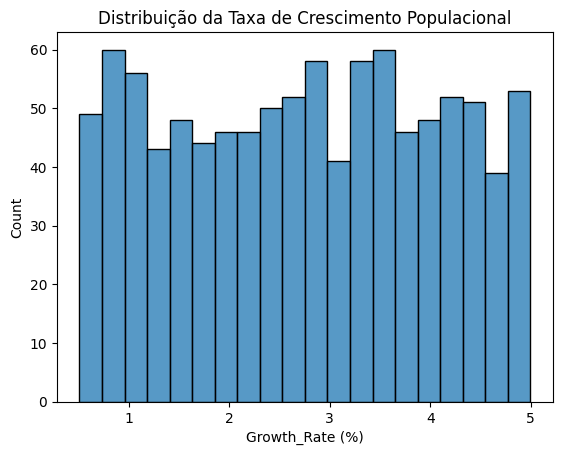

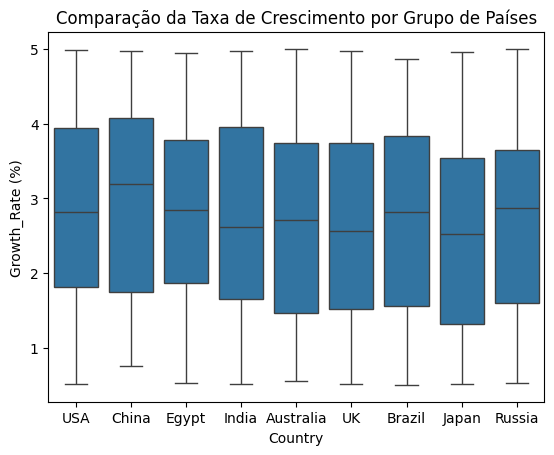

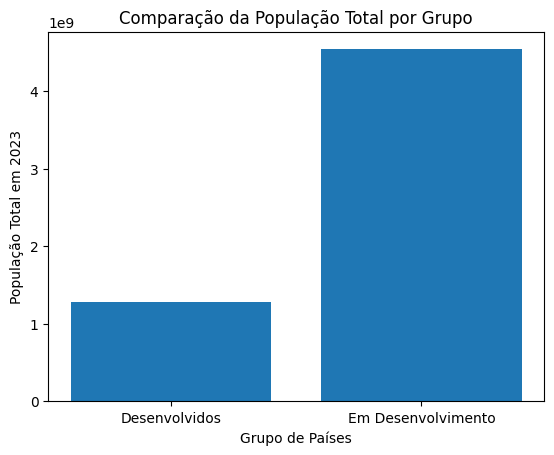

In [7]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("global_population_growth_2024.csv")
x = df.iloc[:, [0, 1, 2, 3]].values
df.info()
df[0:1000]

pop_res = pd.crosstab(index=df["Country"],
                          columns="count")
pop_res

pop_2023=df.loc[df["Country"]=="Population_2023"]
pop_rate=df.loc[df["Country"]=="Growth_Rate (%)"]
pop_2024=df.loc[df["Country"]=="Population_2024"]


print("\n Análise dos Dados:")
print(f"Número de objetos (linha: {df.shape[0]}")
print(f"Number de atributos (coluna): {df.shape[1]}")
print("\nTipo de Dados:")
print(df.dtypes)


print(df.describe())

print("Taxa média", df["Growth_Rate (%)"].mean())
print("Taxa mediana:", df["Growth_Rate (%)"].median())
print("Desvio padrão", df["Growth_Rate (%)"].std())



minimos = df.min()
maximos = df.max()
print("Valores mínimos:\n", minimos)
print("Valores máximos:\n", maximos)


atributo1 = "Population_2023"
atributo2 = "Population_2023"


variancia_1 = df[atributo1].var()
variancia_2 = df[atributo2].var()
print(f"Variância de {atributo1}: {variancia_1}")
print(f"Variância de {atributo2}: {variancia_2}")


desvio_padrao_1 = df[atributo1].std()
desvio_padrao_2 = df[atributo2].std()
print(f"Desvio padrão de {atributo1}: {desvio_padrao_1}")
print(f"Desvio padrão de {atributo2}: {desvio_padrao_2}")


coef_variacao_1 = desvio_padrao_1 / df[atributo1].mean()
coef_variacao_2 = desvio_padrao_2 / df[atributo2].mean()
print(f"Coeficiente de variação de {atributo1}: {coef_variacao_1}")
print(f"Coeficiente de variação de {atributo2}: {coef_variacao_2}")


correlacao = df[atributo1].corr(df[atributo2])
print(f"Correlação entre {atributo1} e {atributo2}: {correlacao}")

cidade_desenvolvimento = "India"
country_data = df.loc[df["Country"] == cidade_desenvolvimento]
print(f"Estatistica do {cidade_desenvolvimento}")
print(country_data.describe())


paises_desenvolvidos = df[df['Country'].isin(['United States', 'Japan', 'Germany'])]
paises_em_desenvolvimento = df[df['Country'].isin(['Brazil', 'India', 'China'])]


pop_2023_desenvolvidos = paises_desenvolvidos['Population_2023']
pop_2023_em_desenvolvimento = paises_em_desenvolvimento['Population_2023']

print(df.describe())

Q1 = df['Growth_Rate (%)'].quantile(0.25)
Q3 = df['Growth_Rate (%)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Growth_Rate (%)'] < (Q1 - 1.5 * IQR)) | (df['Growth_Rate (%)'] > (Q3 + 1.5 * IQR))]
print("Taxa de crescimento:", outliers)

sns.histplot(data=df, x="Growth_Rate (%)", bins=20)
plt.title("Distribuição da Taxa de Crescimento Populacional")
plt.show()

sns.boxplot(x="Country", y="Growth_Rate (%)", data=df)
plt.title("Comparação da Taxa de Crescimento por Grupo de Países")
plt.show()


df_clean = df[~df.index.isin(outliers.index)]


plt.bar(['Desenvolvidos', 'Em Desenvolvimento'], [pop_2023_desenvolvidos.sum(), pop_2023_em_desenvolvimento.sum()])
plt.xlabel('Grupo de Países')
plt.ylabel('População Total em 2023')
plt.title('Comparação da População Total por Grupo')
plt.show()


# Nova seção